In [1]:
import vaex
import numpy as np
import matplotlib.pyplot as plt


Bad key "ytick.right" on line 6 in
/Users/users/breddels/.config/matplotlib/stylelib/bigfont.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "xtick.top" on line 5 in
/Users/users/breddels/.config/matplotlib/stylelib/bigfont.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "ytick.right" on line 6 in
/Users/users/breddels/.config/matplotlib/stylelib/jovanstylez.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "xtick.top" on line 5 in
/Users/users/breddels/.config/matplotlib/stylelib/jovanstylez.mplstyle.
You probably need to get an updated matplotlibrc fil

In [2]:
gaia = vaex.open("/Users/users/breddels/gaia/gaia-dr1.hdf5")

In [3]:
limits = [[180, -180], [-90, 90]]

In [15]:
!mkdir -p /tmp/movie/
!rm /tmp/movie/*.png

In [5]:
plt.style.use("bigfont")

In [27]:
scatter = False
name = "scatter" if scatter else "histogram"
for i, logN in enumerate(np.linspace(3, 9, 100, endpoint=True)):
    N = int(10**logN)
    binby = ["(l+180)%360-180", "b"]
    shape = 512
    gaia.set_active_range(0, N)
    count = gaia.count(binby=binby, limits=limits, shape=shape)
    plt.figure(figsize=(10,6))
    if scatter:
        plt.imshow(count.T > 0, cmap="Greys", vmin=0, vmax=1, origin="lower", extent=limits[0] + limits[1])
    else:
        plt.imshow(np.log10(count.T+1), cmap="Greys", origin="lower", extent=limits[0] + limits[1])
    plt.title("N = {:,}".format(N))
    plt.xlabel("ra")
    plt.ylabel("dec")
    plt.savefig("/tmp/movie/frame-%s-%05d" % (name, i))
    plt.close()
    #plt.show()
    

/Software/users/modules/7/software/anaconda3/4.2.0/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [28]:
!convert -delay 6 /tmp/movie/frame-{name}*.png -loop 1 gaia-{name}.gif    

In [40]:
!ffmpeg -f gif -y -i gaia-histogram.gif -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -pix_fmt yuv420p gaia-histogram.mp4 

ffmpeg version 2.6.8 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 4.8.5 (GCC) 20150623 (Red Hat 4.8.5-4)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -g -pipe -Wall -Wp,-D_FORTIFY_SOURCE=2 -fexceptions -fstack-protector-strong --param=ssp-buffer-size=4 -grecord-gcc-switches -m64 -mtune=generic' --enable-bzlib --disable-crystalhd --enable-gnutls --enable-ladspa --enable-libass --enable-libcdio --enable-libdc1394 --enable-libfaac --enable-nonfree --enable-libfdk-aac --enable-nonfree --disable-indev=jack --enable-libfreetype --enable-libgsm --enable-libmp3lame --enable-openal --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libvorbis --enable-libv4l2 --enable-libx264 --enable-libx265 --enable-libxvid --enable-x11grab --enable-avfilter --enable-a

In [41]:
for name in ["scatter", "histogram"]:
    !ffmpeg -f gif -y -i gaia-{name}.gif -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -pix_fmt yuv420p gaia-{name}.mp4 

ffmpeg version 2.6.8 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 4.8.5 (GCC) 20150623 (Red Hat 4.8.5-4)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -g -pipe -Wall -Wp,-D_FORTIFY_SOURCE=2 -fexceptions -fstack-protector-strong --param=ssp-buffer-size=4 -grecord-gcc-switches -m64 -mtune=generic' --enable-bzlib --disable-crystalhd --enable-gnutls --enable-ladspa --enable-libass --enable-libcdio --enable-libdc1394 --enable-libfaac --enable-nonfree --enable-libfdk-aac --enable-nonfree --disable-indev=jack --enable-libfreetype --enable-libgsm --enable-libmp3lame --enable-openal --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libvorbis --enable-libv4l2 --enable-libx264 --enable-libx265 --enable-libxvid --enable-x11grab --enable-avfilter --enable-a

In [25]:
!ls /tmp/movie/frame*

/tmp/movie/frame-00000.png  /tmp/movie/frame-00050.png
/tmp/movie/frame-00001.png  /tmp/movie/frame-00051.png
/tmp/movie/frame-00002.png  /tmp/movie/frame-00052.png
/tmp/movie/frame-00003.png  /tmp/movie/frame-00053.png
/tmp/movie/frame-00004.png  /tmp/movie/frame-00054.png
/tmp/movie/frame-00005.png  /tmp/movie/frame-00055.png
/tmp/movie/frame-00006.png  /tmp/movie/frame-00056.png
/tmp/movie/frame-00007.png  /tmp/movie/frame-00057.png
/tmp/movie/frame-00008.png  /tmp/movie/frame-00058.png
/tmp/movie/frame-00009.png  /tmp/movie/frame-00059.png
/tmp/movie/frame-00010.png  /tmp/movie/frame-00060.png
/tmp/movie/frame-00011.png  /tmp/movie/frame-00061.png
/tmp/movie/frame-00012.png  /tmp/movie/frame-00062.png
/tmp/movie/frame-00013.png  /tmp/movie/frame-00063.png
/tmp/movie/frame-00014.png  /tmp/movie/frame-00064.png
/tmp/movie/frame-00015.png  /tmp/movie/frame-00065.png
/tmp/movie/frame-00016.png  /tmp/movie/frame-00066.png
/tmp/movie/frame-00017.png  /tmp/movie/frame-00067.png
/tmp/movie

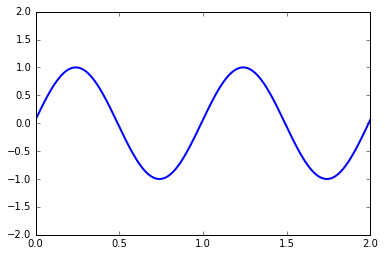

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()